# ASSOCIATION ANALYSIS WITH APRIORI

**File:** Apriori.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# INSTALL AND IMPORT LIBRARIES

The Python library `apyori` contains the implementation of the Apriori algorithm, which can be installed with Python's `pip` command. This command only needs to be done once per machine.

The standard, shorter approach may work:

In [1]:
pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=74cccbafe02f603013796cef0d89d21e25dc767aa67f8585bda2d285fd33c32e
  Stored in directory: /home/vscode/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


If the above command didn't work, it may be necessary to be more explicit, in which case you could run the code below.

In [ ]:
# import sys
# !{sys.executable} -m pip install apyori

Once `apyori` is installed, then load the libraries below.

In [1]:
import pandas as pd              # For dataframes
import matplotlib.pyplot as plt  # For plotting data
from apyori import apriori       # For Apriori algorithm

# LOAD AND PREPARE DATA

For this demonstration, we'll use the dataset `Groceries.csv`, which comes from the R package `arules` and is saved as a CSV file. The data is in transactional format (as opposed to tabular format), which means that each row is a list of items purchased together and that the items may be in different order. There are 32 columns in each row, each column either contains a purchased items or `NaN`.

The code below opens the dataset and converts to to list format, which is necessary for the `apriori()` function.

In [2]:
transactions = []

with open('data/Groceries.csv') as f:
    for line in f:
        transaction = [item for item in line.strip().split(',') if item != 'NaN']
        transactions.append(transaction)
    
transactions[:3]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk']]

# APPLY APRIORI

Call `apriori()` on `transactions`. As parameters `apriori()` can take the minimum support, minimum confidence, minimum lift and minimum items in a transaction. Only the pairs of items that satisfy these criteria would be returned.

In [3]:
rules = list(apriori(
    transactions, 
    min_support=0.001, 
    min_confidence=0.10,
    min_length=2,
    max_length=2))

# Prints one rule
print(rules[0])

RelationRecord(items=frozenset({'bottled water'}), support=0.11052364006100661, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bottled water'}), confidence=0.11052364006100661, lift=1.0)])


## Convert Rules to Readable Format
The printed rule above is not very clear. Let's convert it to a more readable format. We'll add a `From` and `To` field to the DataFrame, to indicate a rule's antecedent and consequent respectively. Hence for a rule of the form `A->B`. The `From` will contain `A` and `To` will contain `B`. We'll also add the `Support`, `Confidence` and `Lift` corresponding to each rule in the DataFrame. 

In [4]:
rules_df = pd.DataFrame(
    [{'From': list(rule[0])[0],
    'To': list(rule[0])[1],
    'Support': rule[1],
    'Confidence': rule[2][0][2],
    'Lift': rule[2][0][3]} for rule in rules if len(rule[0]) == 2])
rules_df = rules_df.dropna()

rules_df.head()

,From,To,Support,Confidence,Lift
0,Instant food products,bottled water,0.001017,0.126582,1.145296
1,Instant food products,butter,0.001220,0.151899,2.741145
2,Instant food products,citrus fruit,0.001118,0.139241,1.682347
3,Instant food products,curd,0.001322,0.164557,3.088583
4,Instant food products,domestic eggs,0.001017,0.126582,1.995091


## List Rules with N's
The code below calls `plot()` on each row of the rules DataFrame to create a list of all the mined rules. First, we have to add two numeric columns corresponding to each item to `rules_df`.

In [6]:
# Pick top rules
rules_df = rules_df.sort_values('Support', ascending=False).head(50)

# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
rules_df.head(20)

,From,To,Support,Confidence,Lift,FromN,ToN
1539,other vegetables,whole milk,0.074835,0.386758,1.513634,19,0
1744,rolls/buns,whole milk,0.056634,0.307905,1.205032,20,0
1929,whole milk,yogurt,0.056024,0.219260,1.571735,0,9
1769,root vegetables,whole milk,0.048907,0.448694,1.756031,4,0
1506,root vegetables,other vegetables,0.047382,0.244877,2.246605,4,19
1540,other vegetables,yogurt,0.043416,0.224383,1.608457,19,9
1505,other vegetables,rolls/buns,0.042603,0.220179,1.197047,19,20
1911,whole milk,tropical fruit,0.042298,0.403101,1.577595,0,11
1864,whole milk,soda,0.040061,0.229738,0.899112,0,7
1725,rolls/buns,soda,0.038332,0.208402,1.195124,20,7


## Plot Rules
Plot each pair of items in the rule. If a rule is A->B, then the item A is in the bottom row of the plot (y=0) and B is in the top row (y=1). The color of each line indicates the support of the rule multiplied by 100 (support*100). The width of each line is controlled by the confidence of each rule.

/tmp/ipykernel_36950/104011188.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))


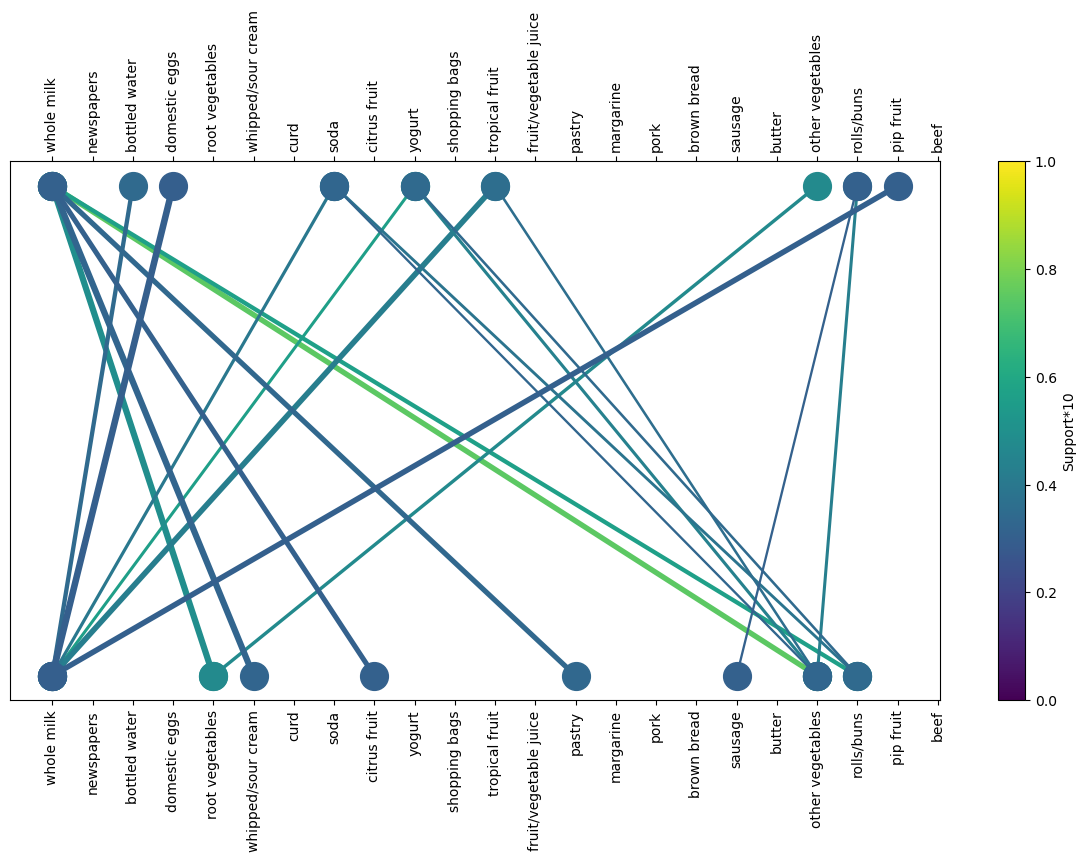

In [7]:
# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10),
             markersize=20,
             lw=row['Confidence'] * 10)

# Adds a colorbar and its title  
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.